            id symbol      name  \
0      bitcoin    btc   Bitcoin   
1     ethereum    eth  Ethereum   
2       tether   usdt    Tether   
3  binancecoin    bnb       BNB   

                                               image  current_price  \
0  https://assets.coingecko.com/coins/images/1/la...   29368.000000   
1  https://assets.coingecko.com/coins/images/279/...    1847.440000   
2  https://assets.coingecko.com/coins/images/325/...       0.998823   
3  https://assets.coingecko.com/coins/images/825/...     240.290000   

     market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0  571413841445                1             616736452384    9171250035   
1  221959753089                2             221959753089    4913119625   
2   83310543336                3              83310543336   10800291504   
3   36970403719                4              48058402239     294112687   

    high_24h  ...  ath_change_percentage                  ath_date        atl  \
0  29445.00

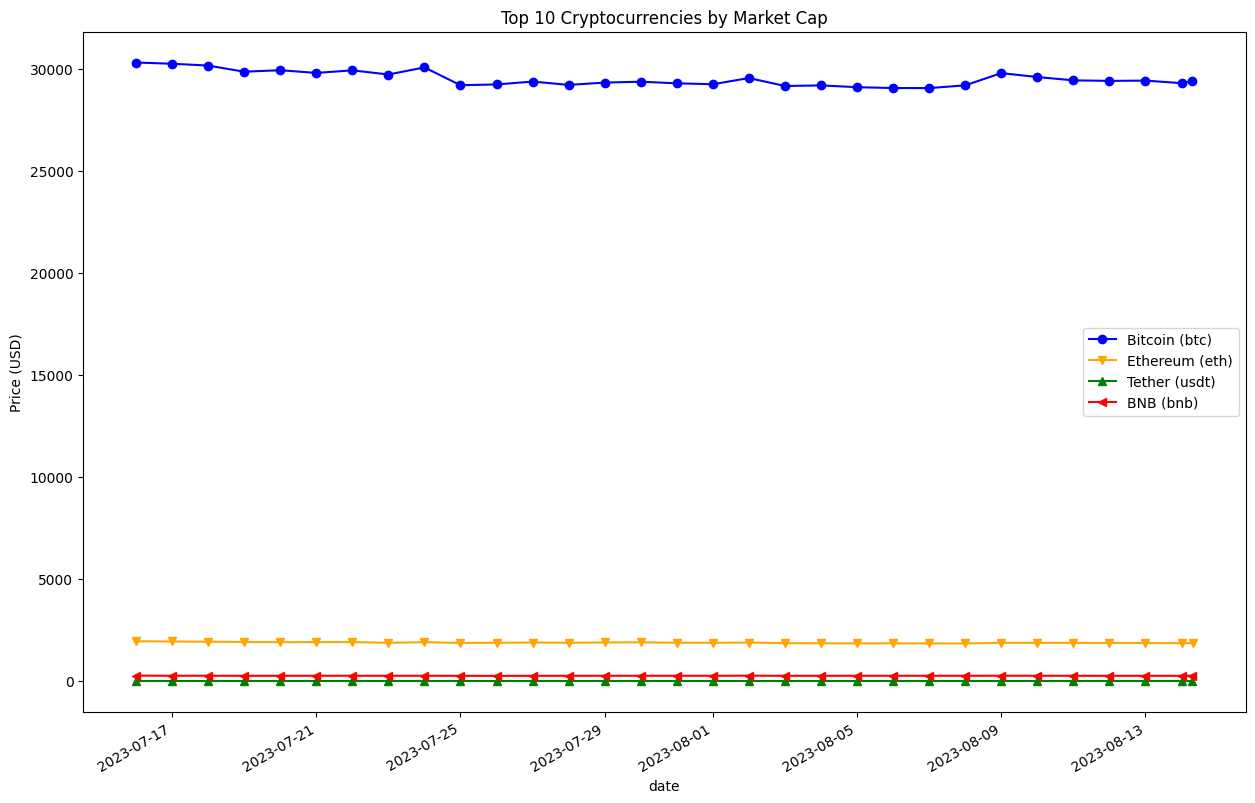

In [1]:
# Import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set plot parameters
plt.rcParams['figure.figsize'] = (15, 10) # Set the size of the plot
plt.title('Top 10 Cryptocurrencies by Market Cap') # Set the title of the plot
plt.xlabel('Date') # Set the x-axis label
plt.ylabel('Price (USD)') # Set the y-axis label
plt.grid() # Add a grid to the plot

# Define the base URL for the CoinGecko API
base_url = 'https://api.coingecko.com/api/v3'

# Define the endpoint for getting the top 10 coins by market cap
endpoint = '/coins/markets'

# Define the query parameters for the request
params = {
    'vs_currency': 'usd', # Get prices in USD
    'order': 'market_cap_desc', # Order by market cap in descending order
    'per_page': 4, # Get only the top 10 coins
    'page': 1, # Get the first page of results
    'sparkline': False, # Do not include sparkline data
}

# Make the HTTP request and store the response
response = requests.get(base_url + endpoint, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response and convert it into a DataFrame
    data = pd.json_normalize(response.json())
    # Print the first 5 rows of the DataFrame
    print(data.head())
else:
    # Print an error message if the request failed
    print('Request failed: ', response.status_code)

# Define a list of colors for each coin
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Define a list of markers for each coin
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', '+', 'x']

# Loop through each row of the DataFrame
for i, row in data.iterrows():
    # Get the coin ID, name, and symbol
    coin_id = row['id']
    coin_name = row['name']
    coin_symbol = row['symbol']

    # Define the endpoint for getting the historical prices for the coin
    endpoint = f'/coins/{coin_id}/market_chart'

    # Define the query parameters for the request
    params = {
        'vs_currency': 'usd', # Get prices in USD
        'days': 30, # Get prices for the past 30 days
        'interval': 'daily' # Get prices at daily intervals
    }

    # Make the HTTP request and store the response
    response = requests.get(base_url + endpoint, params=params)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response and convert it into a DataFrame
        prices = pd.json_normalize(response.json(), record_path='prices')
        # Rename the columns of the DataFrame
        prices.columns = ['date', 'price']
        # Convert the date column to datetime format
        prices['date'] = pd.to_datetime(prices['date'], unit='ms')
        # Set the date column as the index of the DataFrame
        prices.set_index('date', inplace=True)
        # Plot the price column as a line plot with a label, color, and marker
        prices['price'].plot(label=f'{coin_name} ({coin_symbol})', color=colors[i], marker=markers[i])
    else:
        # Print an error message if the request failed
        print(f'Request failed for {coin_name}: ', response.status_code)

# Show the legend of the plot
plt.legend()

# Save the plot as an image file in the src/plot directory
plt.savefig('/workspaces/codespaces-jupyter/src/plot/crypto_price_watch.png')

# Save the data as a CSV file in the data/ directory
data.to_csv('/workspaces/codespaces-jupyter/data/crypto_price_watch.csv')
